img


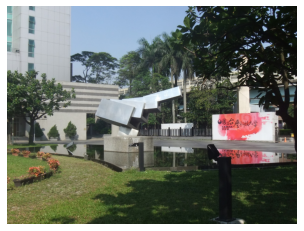

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

pathname = ''
img = cv2.imread(pathname+'data/ntust.jpg', 1)
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img = img[:, :, ::-1]  # BGR 轉 RGB
print('img')
plt.imshow(img), plt.axis('off')
plt.show()

template


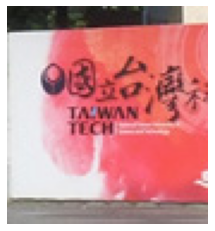

In [3]:

img2 = img.copy()
template = cv2.imread(pathname+'data/c.jpg', 1)  # 待查詢的模版
w, h, ch = template.shape
template = template[:, :, ::-1]
print('template')
plt.imshow(template), plt.axis('off')
plt.show()

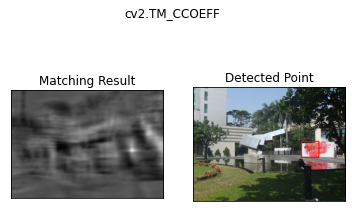

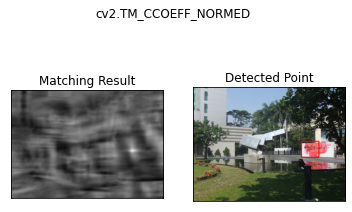

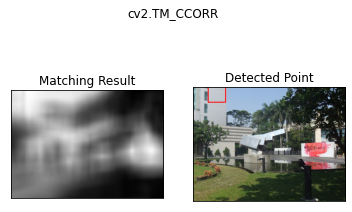

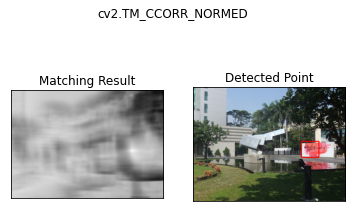

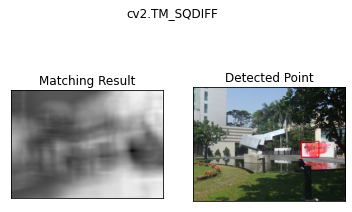

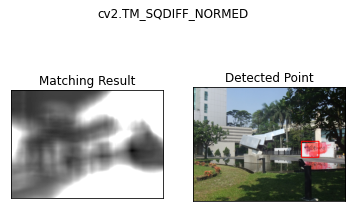

In [4]:

# 六種模版匹配統計方法
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)  # 依序讀取 methods 中的字串
    # 模版匹配，獲得統計圖
    res = cv2.matchTemplate(img, template, method)
    # 找出統計圖上最小值與最大值的數值(val)與(x,y)座標(loc)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # 如果使用 TM_SQDIFF 或 TM_SQDIFF_NORMED 方法，取最小值的位置，當roi矩形框的左上角
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc  # roi矩形框的左上角(x,y)座標
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)  # roi矩形框的右下角(x,y)座標
    cv2.rectangle(img, top_left, bottom_right, (255, 0, 0), 4)  # 繪製roi矩形框
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()